In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
import pickle
import numpy as np
import pandas as pd
from pymongo import MongoClient

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
db = MongoClient()['Rebased']['mecaned']

In [4]:
sample = db.find_one({'cytobands':{ '$exists': True}},{'sample_id':1, 'normalized':1})

In [7]:
high_amp_genes = pd.read_csv('/Users/bogao/DataFiles/Data/genome/band2gene_high_amp_genes.tsv', sep='\t')
high_del_genes = pd.read_csv('/Users/bogao/DataFiles/Data/genome/band2gene_high_del_genes.tsv', sep='\t')

In [9]:
high_amp_genes = high_amp_genes.assign(total = 0)
high_amp_genes = high_amp_genes.assign(length = 0)
high_del_genes = high_del_genes.assign(total = 0)
high_del_genes = high_del_genes.assign(length = 0)

high_amp_genes = high_amp_genes.reset_index(drop=True)
high_del_genes = high_del_genes.reset_index(drop=True)

In [10]:
gene_mat = []


amp_genes = high_amp_genes.to_dict('records')
del_genes = high_del_genes.to_dict('records')

for seg in sample['normalized']:
    if seg['probes'] >4:

        if seg['value'] >2:
            val = 2
        else:
            val = seg['value']


        # count all amp genes
        for g in amp_genes:    
            if (str(g['chr']) == seg['chro']) and (g['start'] < seg['end']) and (g['end'] >= seg['start']):
                size = min(g['end'],seg['end']) - max(g['start'],seg['start'])

                # dup
                if seg['value'] > 0:
                    # update total value
                    g['total'] += size*seg['value']
                    # update total_length
                    g['length'] += size

        # count all del genes
        for g in del_genes:
            if (str(g['chr']) == seg['chro']) and (g['start'] < seg['end']) and (g['end'] >= seg['start']):
                size = min(g['end'],seg['end']) - max(g['start'],seg['start'])
                # del
                if seg['value'] < 0:
                    # update total value
                    g['total'] += size*seg['value']
                    # update total_length
                    g['length'] += size


gene_ave = []
for g in amp_genes:
    if g['length'] >0:
        gene_ave.append(g['total']/g['length'])
    else:
        gene_ave.append(0)
for g in del_genes:
    if g['length'] >0:
        gene_ave.append(g['total']/g['length'])
    else:
        gene_ave.append(0)

gene_mat.append(gene_ave)


In [14]:
np.min(gene_mat)

-8.7763

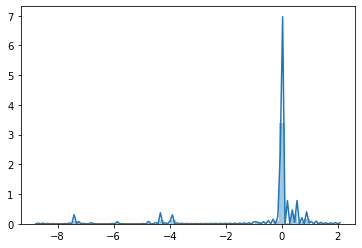

In [15]:
sns.distplot(gene_mat)

In [16]:
norm = pd.DataFrame(sample['normalized'])

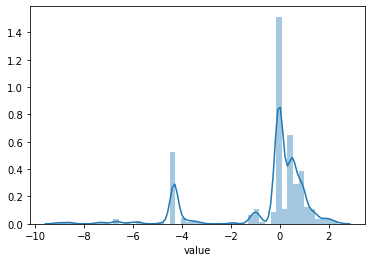

In [19]:
sns.distplot(norm['value'])

In [20]:
norm['value'].min()

-9.1036

In [21]:
2**(-9.1036)*2

0.003635576831609625

In [23]:
fmt = 2**np.array(gene_mat)*2

In [25]:
np.min(fmt)

0.00456142401512228

In [26]:
np.max(fmt)

8.442088772579282